1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
#github link
#https://github.com/anwr98/learning_machine.git
# Load the breast cancer dataset
my_data = load_breast_cancer()

# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(data=my_data.data, columns=my_data.feature_names)

# Add the target column
df['target'] = my_data.target

# Display the first 5 rows of the dataset
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


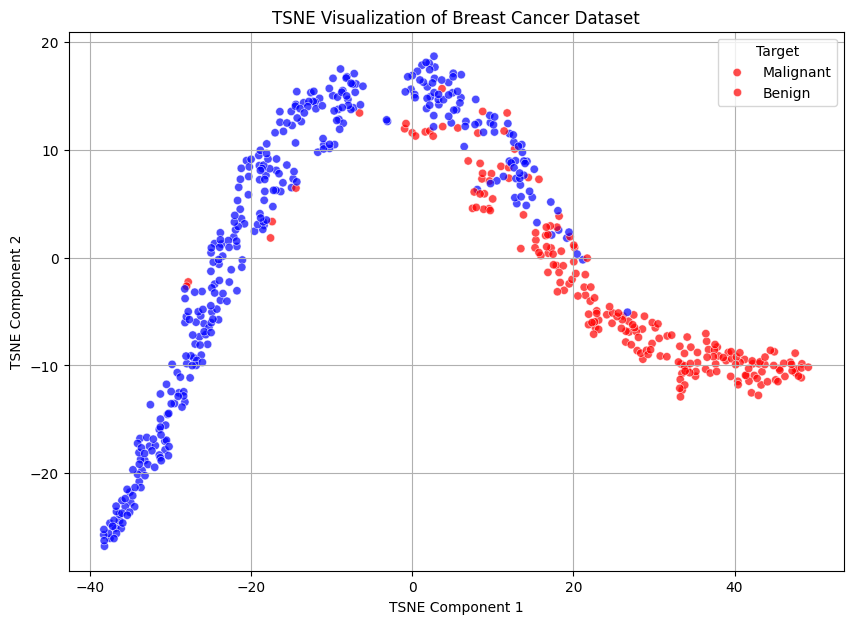

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Extract features and target
X = df.drop(columns=['target']).values
y = df['target']

# Apply TSNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_embedded = tsne.fit_transform(X)

# Create a DataFrame for the TSNE results
tsne_df = pd.DataFrame(X_embedded, columns=['TSNE1', 'TSNE2'])
tsne_df['target'] = y

# Plot the TSNE results
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='TSNE1',
    y='TSNE2',
    hue='target',
    palette=['red', 'blue'],
    data=tsne_df,
    alpha=0.7
)
plt.title('TSNE Visualization of Breast Cancer Dataset')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Target', labels=['Malignant', 'Benign'])
plt.grid(True)
plt.show()


3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


X = my_data.data
Y = my_data.target


test_size = 0.2
random_state = 42

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

# Print the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")


X_train shape: (455, 30)
X_test shape: (114, 30)
Y_train shape: (455,)
Y_test shape: (114,)


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=8,
    max_features='sqrt',
    ccp_alpha=0.01,
    random_state=42

)

model_decision_tree.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=10,
                       max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=10, random_state=42)

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(
    n_estimators=400,
    criterion='gini',
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

model_random_forest.fit(X_train, Y_train)




RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=400,
                       random_state=42)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.7,
    algorithm='SAMME.R',
    random_state=10
)


model_adaboost.fit(X_train, Y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.7, n_estimators=200, random_state=10)

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Evaluate each model on the test data
models = {
    "Decision Tree": model_decision_tree,
    "Random Forest": model_random_forest,
    "AdaBoost": model_adaboost
}

# Define a function to calculate metrics
def evaluate_model(name, model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='binary')
    recall = recall_score(Y_test, Y_pred, average='binary')
    f1 = f1_score(Y_test, Y_pred, average='binary')
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    return acc, precision, recall, f1

# Initialize a dictionary to store results
results = {}

# Evaluate all models
for name, model in models.items():
    results[name] = evaluate_model(name, model, X_test, Y_test)

# Determine the winner based on F1 Score (Decisive Metric)
best_model_name = max(results, key=lambda x: results[x][3])  # Index 3 corresponds to F1 Score
print(f"\nWinner: {best_model_name} with the highest F1 Score: {results[best_model_name][3]:.4f}")



Decision Tree Evaluation:
Accuracy: 0.9825
Precision: 0.9859
Recall: 0.9859
F1 Score: 0.9859
Confusion Matrix:
[[42  1]
 [ 1 70]]

Random Forest Evaluation:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722
Confusion Matrix:
[[40  3]
 [ 1 70]]

AdaBoost Evaluation:
Accuracy: 0.9825
Precision: 0.9726
Recall: 1.0000
F1 Score: 0.9861
Confusion Matrix:
[[41  2]
 [ 0 71]]

Winner: AdaBoost with the highest F1 Score: 0.9861
